# Deconvolution Benchmark: Python Scikit-image

---
## Setup

In [1]:
import numpy as np
from skimage import img_as_float32 as img_as_float
from skimage.restoration import richardson_lucy
import matplotlib.pyplot as plt
import imageio.v2 as iio

---
## Test image

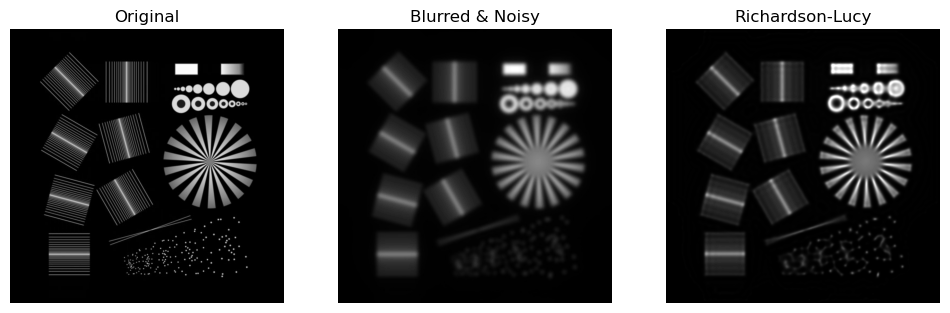

In [2]:
# Cargar las imágenes
imgP = img_as_float(iio.imread("ImagenPrueba.jpg"))
psfP = img_as_float(iio.imread("psf.jpg"))
imgP_n = img_as_float(iio.imread("blurrednoisy_img.jpg"))

# Deconvolución de la imagen usando el algoritmo de Richardson-Lucy
res = richardson_lucy(imgP_n, psfP, num_iter=30)

# Mostrar las imágenes original, borrosa y deconvolucionada
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(imgP, cmap='gray')
plt.title('Original')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

plt.subplot(1, 3, 2)
plt.imshow(imgP_n, cmap='gray')
plt.title('Blurred & Noisy')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

plt.subplot(1, 3, 3)
plt.imshow(res, cmap='gray')
plt.title('Richardson-Lucy')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

plt.show()


In [3]:
print(imgP_n.shape)
print(psfP.shape)

(512, 512)
(512, 512)


Medimos ahora el tiempo de la función richardson_lucy()

In [4]:
%timeit -n 1 -r 100 richardson_lucy(imgP_n, psfP, num_iter=30)

1.32 s ± 74.6 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


In [5]:
import time
from skimage.restoration import richardson_lucy
import numpy as np

# Definir el decorador
def medir_tiempo(func):
    def wrapper(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fin = time.time()
        print(f"Tiempo de ejecución de {func.__name__}: {fin - inicio} segundos")
        return resultado
    return wrapper

# Decorar la función richardson_lucy
richardson_lucy_con_tiempo = medir_tiempo(richardson_lucy)

# Supongamos que imgP_n y psfP ya están definidas y cargadas
imgP_n = img_as_float(np.random.rand(512, 512))
psfP = img_as_float(np.ones((512, 512)) / 25)

# Llamar a la función decorada
resultado = richardson_lucy_con_tiempo(imgP_n, psfP, num_iter=30)


Tiempo de ejecución de richardson_lucy: 1.3247838020324707 segundos


---
## Cell

In [6]:
psf_cell = img_as_float(iio.imread("cells3d_psf.tif"))
convolved = img_as_float(iio.imread("cells3d_convolved.tif"))

(-0.5, 255.5, 255.5, -0.5)

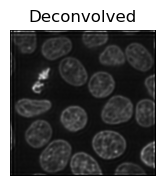

In [7]:
number_of_iterations = 30
deconvolved = richardson_lucy(convolved, psf_cell, number_of_iterations)

plt.subplot(1, 3, 1)
plt.imshow(deconvolved, cmap='gray')
plt.title('Deconvolved')
plt.axis('off') 

In [8]:
%timeit -n 1 -r 100  richardson_lucy(convolved, psf_cell, number_of_iterations)

308 ms ± 37.4 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
